### `In this notebook we will:`

1. Select suitable features for the regressions
2. Run the regressions
3. Visualize our results 
4. Material for report

###### _note: running the notebook takes about 15-20mins_

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

### `Import data for Task 3`

In [2]:
# import the data sets
fullRentalDataCologne = pd.read_csv("../Data Prep/fullRentalDataCologne.csv")
fullRentalDataEssen = pd.read_csv("../Data Prep/fullRentalDataEssen.csv")

# `1. Picking the right features for the regression`

What we now have is a separate dataframe for each city with all the necessary weather data and the corresponding rented bikes. 

Now: Pick the right features for the upcomming regressions via the methods from lecture 5:  
1. Correlation
2. High variance
3. Lasso - Regularization
4. Filtering  

**Important**: Since we only have a handful of features there may be no need for dimensionality reduction or great feature extraction. Still we are going to look at point 1 to 3.

## Correlations between features

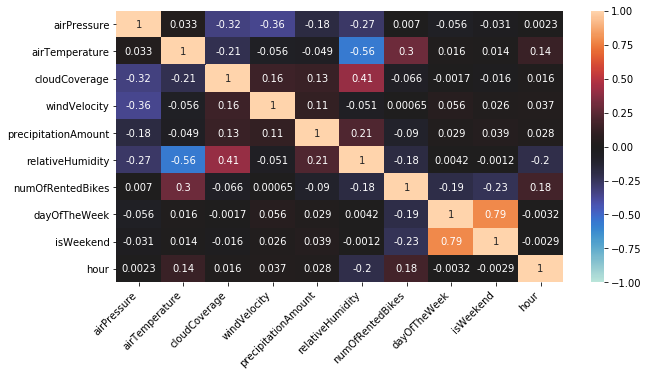

In [3]:
corrEss = fullRentalDataEssen.corr()
plt.figure(figsize = (10,5))
ax = sns.heatmap(corrEss, vmin=-1, vmax=1, center=0, annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

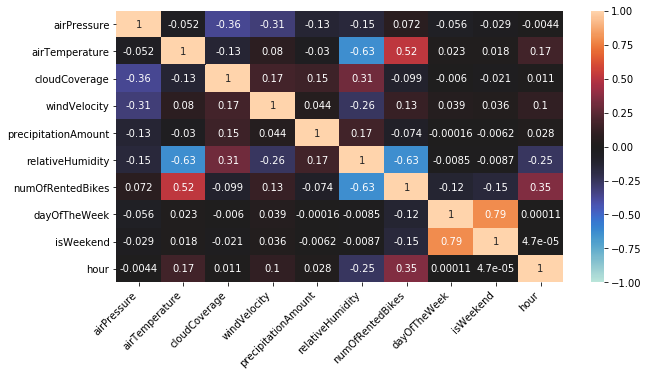

In [4]:
corrCol = fullRentalDataCologne.corr()
plt.figure(figsize = (10,5))
ax = sns.heatmap(corrCol, vmin=-1, vmax=1, center=0, annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

## Variance

In [5]:
fullRentalDataCologne.var()

airPressure             110.885944
airTemperature           54.923687
cloudCoverage             7.653858
windVelocity              3.259109
precipitationAmount       0.224836
relativeHumidity        331.166454
numOfRentedBikes       6654.336774
dayOfTheWeek              3.999859
isWeekend                 0.203272
hour                     47.925344
dtype: float64

In [6]:
fullRentalDataEssen.var()

airPressure            115.346281
airTemperature          50.019141
cloudCoverage           10.340906
windVelocity             2.664596
precipitationAmount      0.238056
relativeHumidity       376.469592
numOfRentedBikes        30.767698
dayOfTheWeek             3.982837
isWeekend                0.202052
hour                    47.884010
dtype: float64

### The choice of the features

Since we are not having so much features, we might as well be keeping all of them, since our dimensionality reduction did not really show any real conclusion.  

So we are going with the hypothesis, that if the weather is nice, many bikes will be rented. Plus when it is weekend and of course not late hours.  
  
y = numOfRentedBikes  
xp = "weekday"	"hour"	"airPressure"	"airTemperature"	"cloudCoverage"	"windVelocity"	"precipitationAmount"	"relativeHumidity"

### Visualization of the dependencies

In [7]:
y = fullRentalDataCologne["numOfRentedBikes"].values
x1 = fullRentalDataCologne["dayOfTheWeek"].values
x2 = fullRentalDataCologne["hour"].values
x3 = fullRentalDataCologne["airPressure"].values
x4 = fullRentalDataCologne["airTemperature"].values
x5 = fullRentalDataCologne["cloudCoverage"].values
x6 = fullRentalDataCologne["windVelocity"].values
x7 = fullRentalDataCologne["precipitationAmount"].values
x8 = fullRentalDataCologne["relativeHumidity"].values

In [8]:
#rented bikes from mo-su
df1 = fullRentalDataCologne[['dayOfTheWeek', 'numOfRentedBikes']].copy()
df1 = df1.groupby("dayOfTheWeek").mean()

#rented bikes from 0-24
df2 = fullRentalDataCologne[['hour','numOfRentedBikes']].copy()
df2 = df2.groupby("hour").mean()

#Cloud coverage vs rented bikes per hour
df3 = fullRentalDataCologne[['cloudCoverage', 'numOfRentedBikes']].copy()
df3 = df3.groupby("cloudCoverage").mean()

#Airtemperature vs rented bikes per hour
df4 = fullRentalDataCologne[['airTemperature', 'numOfRentedBikes']].copy()
df4 = df4.groupby("airTemperature").mean()

Text(0, 0.5, 'Mean Rented Bikes')

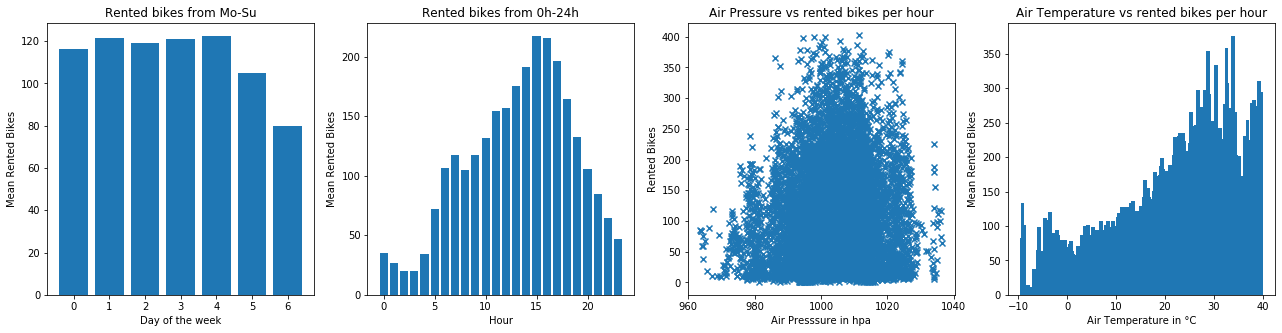

In [9]:
diag, axes = plt.subplots(1, 4, figsize=(22, 5))

axes[0].bar(df1.index, df1["numOfRentedBikes"])
axes[0].axis('tight')
axes[0].set_title("Rented bikes from Mo-Su")
axes[0].set_xlabel("Day of the week")
axes[0].set_ylabel("Mean Rented Bikes")

axes[1].bar(df2.index, df2["numOfRentedBikes"])
axes[1].axis('tight')
axes[1].set_title("Rented bikes from 0h-24h")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Mean Rented Bikes")

axes[2].scatter(x3, y, marker="x")
axes[2].set_title("Air Pressure vs rented bikes per hour")
axes[2].set_xlabel("Air Presssure in hpa")
axes[2].set_ylabel("Rented Bikes")

axes[3].bar(df4.index, df4["numOfRentedBikes"])
axes[3].axis('tight')
axes[3].set_title("Air Temperature vs rented bikes per hour")
axes[3].set_xlabel("Air Temperature in °C")
axes[3].set_ylabel("Mean Rented Bikes")

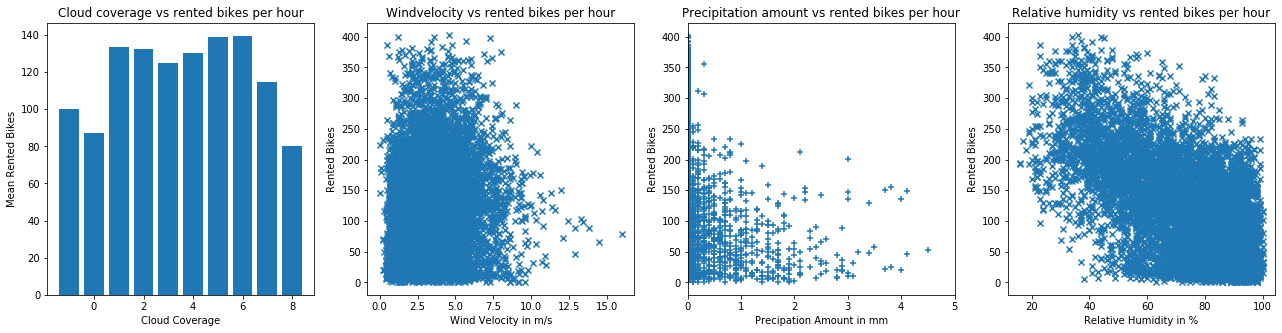

In [10]:
diag, axes = plt.subplots(1, 4, figsize=(22, 5))

axes[0].bar(df3.index, df3["numOfRentedBikes"])
axes[0].set_title("Cloud coverage vs rented bikes per hour")
axes[0].set_xlabel("Cloud Coverage")
axes[0].set_ylabel("Mean Rented Bikes")

axes[1].scatter(x6, y, marker="x")
axes[1].axis('tight')
axes[1].set_title("Windvelocity vs rented bikes per hour")
axes[1].set_xlabel("Wind Velocity in m/s")
axes[1].set_ylabel("Rented Bikes")

axes[2].scatter(x7, y, marker="+")
axes[2].set_xlim([0, 5])
axes[2].set_title("Precipitation amount vs rented bikes per hour")
axes[2].set_xlabel("Precipation Amount in mm")
axes[2].set_ylabel("Rented Bikes")

axes[3].scatter(x8, y, marker="x")
axes[3].set_title("Relative humidity vs rented bikes per hour")
axes[3].set_xlabel("Relative Humidity in %")
axes[3].set_ylabel("Rented Bikes")

plt.show()

# `2. Creation of Prediction Model`

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

### Split the dataset

In [12]:
# create feauture frames
x_col = fullRentalDataCologne[["airPressure", "airTemperature", "cloudCoverage", "windVelocity", "precipitationAmount", "relativeHumidity", "dayOfTheWeek", "isWeekend", "hour"]]
y_col = fullRentalDataCologne["numOfRentedBikes"]

# split the data in 70 training and 30 testing sets
x_col_train, x_col_test, y_col_train, y_col_test = train_test_split(x_col, y_col, test_size=0.3,random_state=34 )

# make a combi data set of tarining and holdout dataset
x_col_train_hold = x_col_train
y_col_train_hold = y_col_train

# now split x_ess_train to achive 50-20-30 split
x_col_train, x_col_hold, y_col_train, y_col_hold = train_test_split(x_col_train, y_col_train, test_size=(0.2/0.7),random_state=34 )

In [13]:
# create feauture frames
x_ess = fullRentalDataEssen[["airPressure", "airTemperature", "cloudCoverage", "windVelocity", "precipitationAmount", "relativeHumidity", "dayOfTheWeek", "isWeekend", "hour"]]
y_ess = fullRentalDataEssen["numOfRentedBikes"]

# split the data in 70 training and 30 testing sets
x_ess_train, x_ess_test, y_ess_train, y_ess_test = train_test_split(x_ess, y_ess, test_size=0.3,random_state=34 )

# make a combi data set of tarining and holdout dataset
x_ess_train_hold = x_ess_train
y_ess_train_hold = y_ess_train

# now split x_ess_train to achive 50-20-30 split
x_ess_train, x_ess_hold, y_ess_train, y_ess_hold = train_test_split(x_ess_train, y_ess_train, test_size=(0.2/0.7),random_state=34 )

## We now have  
**Cologne:**  
x_col_train, y_col_train -   50%, input features for the training of the prediction model  
x_col_hold, y_col_hold - 20%, for tuning the hyperparamters   
x_col_test, y_col_test  - 30%, test data set to control the accuracy of the prediction model

x_col_train_hold, y_col_train_hold - combination of training and holdout set incase we want to retrain with more data
  
It is the same for the data of Essen

## `1. Linear Regression`

### `1.1 Multiple Linear Regression`

In [14]:
# essen
lin_mod_ess = LinearRegression()

# train model
lin_mod_ess.fit(x_ess_train_hold, y_ess_train_hold)

# make predictions using model
y_pred_lin_ess = lin_mod_ess.predict(x_ess_test)

mae_lin_mod_ess = mean_absolute_error(y_ess_test, y_pred_lin_ess)
rmse_lin_mod_ess = mean_squared_error(y_ess_test, y_pred_lin_ess)**0.5

# cologne
lin_mod_col = LinearRegression()

lin_mod_col.fit(x_col_train_hold, y_col_train_hold)
y_pred_lin_col = lin_mod_col.predict(x_col_test)

mae_lin_mod_col = mean_absolute_error(y_col_test, y_pred_lin_col)
rmse_lin_mod_col = mean_squared_error(y_col_test, y_pred_lin_col)**0.5

#### Performance Evaluation

In [15]:
print("Coefficients Essen ", lin_mod_ess.coef_, lin_mod_ess.intercept_, "\n")
print("Essen MAE ", mae_lin_mod_ess)
print("Essen RMSE ", rmse_lin_mod_ess, "\n")

print("Coefficients Cologne ", lin_mod_col.coef_, lin_mod_col.intercept_, "\n")
print("Cologne MAE ", mae_lin_mod_col)
print("Cologne RMSE ", rmse_lin_mod_col)

Coefficients Essen  [-0.00755151  0.23441159 -0.04755648  0.06294138 -0.84390379  0.01287983
 -0.07875452 -2.72592529  0.11889009] 9.911882018652253 

Essen MAE  3.8371634475822565
Essen RMSE  4.960541444260995 

Coefficients Cologne  [  0.23680493   2.37658166   2.51798033  -1.36528112   0.49521855
  -2.10241756  -0.73548486 -26.59877293   2.44351046] -25.133595789573306 

Cologne MAE  45.66670670036625
Cologne RMSE  57.45618658822073


#### Hyperparameter Tuning

Since there are no real hyperparameters we train the regression with our big traing data set.

Linear Regression itself does not have an easy hyperparameter to tune. You can either choose the number of features for the model, adjust the learn rate or use LASSO (L1) or ridge (L2) regularization.  
    


## `1.2 Lasso Regression`

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

### Lasso Regresion (L1) Essen

In [17]:
x_ess_train_hold_stand = x_ess_train_hold.copy()
x_ess_test_stand = x_ess_test.copy()

In [18]:
# standardize input data
scaler_ess = StandardScaler()

x_ess_train_hold_stand[['airPressure', 'airTemperature', 'cloudCoverage', 'windVelocity',
       'precipitationAmount', 'relativeHumidity', 'dayOfTheWeek', 'isWeekend',
       'hour']]  = scaler_ess.fit_transform(x_ess_train_hold_stand[['airPressure', 'airTemperature', 'cloudCoverage', 'windVelocity',
       'precipitationAmount', 'relativeHumidity', 'dayOfTheWeek', 'isWeekend',
       'hour']])

x_ess_test_stand [['airPressure', 'airTemperature', 'cloudCoverage', 'windVelocity',
       'precipitationAmount', 'relativeHumidity', 'dayOfTheWeek', 'isWeekend',
       'hour']] = scaler_ess.fit_transform(x_ess_test_stand[['airPressure', 'airTemperature', 'cloudCoverage', 'windVelocity',
       'precipitationAmount', 'relativeHumidity', 'dayOfTheWeek', 'isWeekend',
       'hour']])

In [19]:
# define polynomial features
Poly_L1_ess = PolynomialFeatures(5)

# fit
x_ess_train_poly_L1 = Poly_L1_ess.fit_transform(x_ess_train_hold_stand)
x_ess_test_poly_L1 = Poly_L1_ess.fit_transform(x_ess_test_stand)

In [20]:
# define lambdas
lambdas_ess = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num_ess = 7
pred_num_ess = x_ess_train_hold_stand.shape[1]

# prepare data for enumerate
test_mae_l1_ess = np.zeros(l_num_ess)
test_rmse_l1_ess = np.zeros(l_num_ess)

In [21]:
# enumerate through lambdas with index and i
# takes some time
for ind, i in enumerate(lambdas_ess):    
    reg_l1_ess = Lasso(alpha = i)
    reg_l1_ess.fit(x_ess_train_poly_L1, y_ess_train_hold)
    
    prediction_L1_ess = reg_l1_ess.predict(x_ess_test_poly_L1)

    test_mae_l1_ess[ind] = mean_absolute_error(y_ess_test, prediction_L1_ess)
    test_rmse_l1_ess[ind] = mean_squared_error(y_ess_test, prediction_L1_ess)**0.5

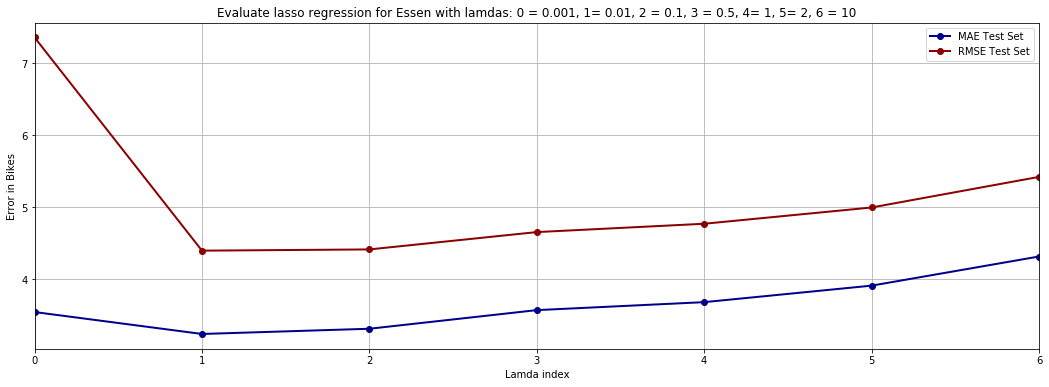

In [22]:
# Plotting
plt.figure(figsize=(18, 6))
plt.plot(test_mae_l1_ess, 'bo-', label='MAE Test Set', color="darkblue",  linewidth=2)
plt.plot(test_rmse_l1_ess, 'bo-', label='RMSE Test Set', color="darkred",  linewidth=2)
plt.xlabel('Lamda index'); plt.ylabel('Error in Bikes')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression for Essen with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

It is clear to see that Lambda = 0.01 give the best results. The best degree for the Input features was determined manually and found out by comparison. After a degree of 5 no further improvement could be seen.

In [23]:
model_L1_ess = Lasso(alpha = 0.01)

model_L1_ess.fit(x_ess_train_poly_L1, y_ess_train_hold)

# predict with model
prediction_L1_ess = model_L1_ess.predict(x_ess_test_poly_L1)

mae_L1_ess = mean_absolute_error(y_ess_test, prediction_L1_ess)
rmse_L1_ess = mean_squared_error(y_ess_test, prediction_L1_ess)**0.5

print("Essen MAE: ", mae_L1_ess)
print("Essen RMSE: ", rmse_L1_ess)

Essen MAE:  3.2360731189341254
Essen RMSE:  4.39539542822515


### Lasso Regression (L1) Cologne

In [24]:
# standardize input data
scaler_col = StandardScaler()

x_col_train_hold_stand= x_col_train_hold.copy()
x_col_test_stand = x_col_test.copy()

x_col_train_hold_stand[['airPressure', 'airTemperature', 'cloudCoverage', 'windVelocity',
       'precipitationAmount', 'relativeHumidity', 'dayOfTheWeek', 'isWeekend',
       'hour']] = scaler_col.fit_transform(x_col_train_hold_stand[['airPressure', 'airTemperature', 'cloudCoverage', 'windVelocity',
       'precipitationAmount', 'relativeHumidity', 'dayOfTheWeek', 'isWeekend',
       'hour']])

x_col_test_stand[['airPressure', 'airTemperature', 'cloudCoverage', 'windVelocity',
       'precipitationAmount', 'relativeHumidity', 'dayOfTheWeek', 'isWeekend',
       'hour']] = scaler_col.fit_transform(x_col_test_stand[['airPressure', 'airTemperature', 'cloudCoverage', 'windVelocity',
       'precipitationAmount', 'relativeHumidity', 'dayOfTheWeek', 'isWeekend',
       'hour']])

In [25]:
# define polynomial features
Poly_L1_col = PolynomialFeatures(5)

# fit
x_col_train_poly_L1 = Poly_L1_col.fit_transform(x_col_train_hold_stand)
x_col_test_poly_L1 = Poly_L1_col.fit_transform(x_col_test_stand)

In [26]:
# define lambdas
lambdas_col = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num_col = 7
pred_num_col = x_col_train_hold_stand.shape[1]

# prepare data for enumerate
test_mae_l1_col = np.zeros(l_num_col)
test_rmse_l1_col = np.zeros(l_num_col)

In [27]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas_col):    
    reg_l1_col = Lasso(alpha = i)
    reg_l1_col.fit(x_col_train_poly_L1, y_col_train_hold)
    
    prediction_L1_col = reg_l1_col.predict(x_col_test_poly_L1)

    test_mae_l1_col[ind] = mean_absolute_error(y_col_test, prediction_L1_col)
    test_rmse_l1_col[ind] = mean_squared_error(y_col_test, prediction_L1_col)**0.5

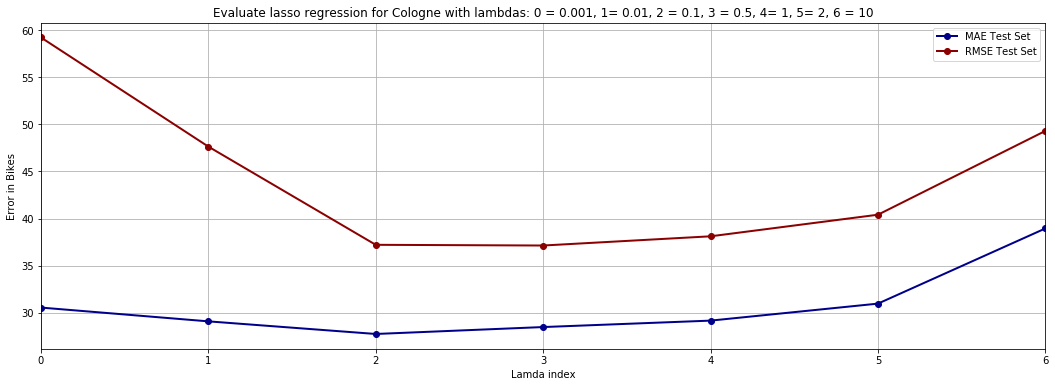

In [28]:
# Plotting
plt.figure(figsize=(18, 6))
plt.plot(test_mae_l1_col, 'bo-', label='MAE Test Set', color="darkblue",  linewidth=2)
plt.plot(test_rmse_l1_col, 'bo-', label='RMSE Test Set', color="darkred",  linewidth=2)
plt.xlabel('Lamda index'); plt.ylabel('Error in Bikes')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression for Cologne with lambdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

It is clear to see that Lambda = 0.1 give the best results. The best degree for the Input features was determined manually and found out by comparison. After a degree of 5 no further improvement could be seen.

In [29]:
model_L1_col = Lasso(alpha = 0.1)

model_L1_col.fit(x_col_train_poly_L1, y_col_train_hold)

# predict with model
prediction_L1_col = model_L1_col.predict(x_col_test_poly_L1)

mae_L1_col = mean_absolute_error(y_col_test, prediction_L1_col)
rmse_L1_col = mean_squared_error(y_col_test, prediction_L1_col)**0.5

print("Cologne MAE: ", mae_L1_col)
print("Cologne RMSE: ", rmse_L1_col)

Cologne MAE:  27.749865209238255
Cologne RMSE:  37.21070119868691


## `2. Random Forest Regression`


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### 2.1 Random Forest Essen

In [31]:
# Finding best parameters for RandomForestRegressor
# essen
rf_ess = RandomForestRegressor(random_state=0)
rf_params_ess = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf_ess = GridSearchCV(rf_ess,rf_params_ess,cv=3)
gs_rf_ess.fit(x_ess_train_hold,y_ess_train_hold)
b_ess = gs_rf_ess.best_params_

In [32]:
# Fitting the model with best params
# essen
RF_ess = RandomForestRegressor(n_estimators=b_ess['n_estimators'],max_depth=b_ess['max_depth'],min_samples_leaf=b_ess['min_samples_leaf'],random_state=0)
model_rf_ess = RF_ess.fit(x_ess_train_hold,y_ess_train_hold)
y_pred_rf_ess = model_rf_ess.predict(x_ess_test)

mae_rf_ess = mean_absolute_error(y_ess_test, y_pred_rf_ess)
rmse_rf_ess = mean_squared_error(y_ess_test, y_pred_rf_ess)**0.5

print("Essen MAE: ", mae_rf_ess)
print("Essen RMSE: ", rmse_rf_ess, "\n")

Essen MAE:  3.071544957271455
Essen RMSE:  4.1755144501269035 



### 2.2 Random Forest Cologne

In [33]:
# cologne
rf_col = RandomForestRegressor(random_state=0)
rf_params_col = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf_col = GridSearchCV(rf_col,rf_params_col,cv=3)
gs_rf_col.fit(x_col_train_hold,y_col_train_hold)
b_col = gs_rf_col.best_params_

In [34]:
# cologne
# Fitting the model with best params
RF_col = RandomForestRegressor(n_estimators=b_col['n_estimators'],max_depth=b_col['max_depth'],min_samples_leaf=b_col['min_samples_leaf'],random_state=0)
model_rf_col = RF_col.fit(x_col_train,y_col_train)
y_pred_rf_col = model_rf_col.predict(x_col_test)

mae_rf_col = mean_absolute_error(y_col_test, y_pred_rf_col)
rmse_rf_col = mean_squared_error(y_col_test, y_pred_rf_col)**0.5

print("Cologne MAE: ", mae_rf_col)
print("Cologne RMSE: ", rmse_rf_col)

Cologne MAE:  23.626626563012735
Cologne RMSE:  33.405665387009165


## `3. Artificial Neural Network`

**Import** necessary packages:

In [35]:
# For 'Building the model with the Keras functional API'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

*You may need to install keras-tuner*

In [36]:
#pip install keras-tuner

In [37]:
# For 'Finding the best model with hyperparameter tuning'
import kerastuner
from kerastuner.tuners import Hyperband
import os.path
import IPython

### 3.1 Artificial Neural Network Essen

#### 3.1.1 Data Loading

In [38]:
fullRentalDataEssen.describe()

,airPressure,airTemperature,cloudCoverage,windVelocity,precipitationAmount,relativeHumidity,numOfRentedBikes,dayOfTheWeek,isWeekend,hour
count,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,997.196949,11.603837,5.373786,3.264390,0.098301,73.291378,6.260171,2.986939,0.280975,11.507050
std,10.739939,7.072421,3.215728,1.632359,0.487910,19.402824,5.546864,1.995705,0.449502,6.919827
min,956.500000,-4.500000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000
25%,990.600000,6.275000,2.000000,2.100000,0.000000,60.000000,2.000000,1.000000,0.000000,6.000000
50%,997.500000,11.000000,7.000000,3.000000,0.000000,77.000000,5.000000,3.000000,0.000000,12.000000
75%,1004.500000,16.200000,8.000000,4.200000,0.000000,90.000000,9.000000,5.000000,1.000000,18.000000
max,1029.800000,39.300000,8.000000,12.900000,15.800000,100.000000,46.000000,6.000000,1.000000,23.000000


**Instantiate** a new DataFrame Object which will be **normalized** in (3.1.2):

In [39]:
fullRentalDataEssen_norm = fullRentalDataEssen.copy()

#### 3.1.2 Data Preprocessing

Our Dataset contains negative as well as very high values.  
This is not ideal for a neural network, in general we want to have our input values small.  
Our output value numOfRentedBikes does not have to be in the range [0, 1], but we will call it y_norm too, to avoid a name collision in this notebook.  
We will **rescale** input values to be in the **[0, 1] range** in the following:

In [40]:
# Re-scale: (input minus minimum) divided by range
fullRentalDataEssen_norm['airPressure'] = (fullRentalDataEssen['airPressure'] - fullRentalDataEssen['airPressure'].min()) / (fullRentalDataEssen['airPressure'].max() - fullRentalDataEssen['airPressure'].min())
fullRentalDataEssen_norm['airTemperature'] = (fullRentalDataEssen['airTemperature'] - fullRentalDataEssen['airTemperature'].min()) / (fullRentalDataEssen['airTemperature'].max() - fullRentalDataEssen['airTemperature'].min())
fullRentalDataEssen_norm['cloudCoverage'] = (fullRentalDataEssen['cloudCoverage'] - fullRentalDataEssen['cloudCoverage'].min()) / (fullRentalDataEssen['cloudCoverage'].max() - fullRentalDataEssen['cloudCoverage'].min())
fullRentalDataEssen_norm['windVelocity'] = (fullRentalDataEssen['windVelocity'] - fullRentalDataEssen['windVelocity'].min()) / (fullRentalDataEssen['windVelocity'].max() - fullRentalDataEssen['windVelocity'].min())
fullRentalDataEssen_norm['precipitationAmount'] = (fullRentalDataEssen['precipitationAmount'] - fullRentalDataEssen['precipitationAmount'].min()) / (fullRentalDataEssen['precipitationAmount'].max() - fullRentalDataEssen['precipitationAmount'].min())
fullRentalDataEssen_norm['relativeHumidity'] = (fullRentalDataEssen['relativeHumidity'] - fullRentalDataEssen['relativeHumidity'].min()) / (fullRentalDataEssen['relativeHumidity'].max() - fullRentalDataEssen['relativeHumidity'].min())
fullRentalDataEssen_norm['dayOfTheWeek'] = (fullRentalDataEssen['dayOfTheWeek'] - fullRentalDataEssen['dayOfTheWeek'].min()) / (fullRentalDataEssen['dayOfTheWeek'].max() - fullRentalDataEssen['dayOfTheWeek'].min())
fullRentalDataEssen_norm['hour'] = (fullRentalDataEssen['hour'] - fullRentalDataEssen['hour'].min()) / (fullRentalDataEssen['hour'].max() - fullRentalDataEssen['hour'].min())

In [41]:
fullRentalDataEssen_norm.describe()

,airPressure,airTemperature,cloudCoverage,windVelocity,precipitationAmount,relativeHumidity,numOfRentedBikes,dayOfTheWeek,isWeekend,hour
count,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,0.555211,0.367668,0.671723,0.253053,0.006222,0.693004,6.260171,0.497823,0.280975,0.500307
std,0.146520,0.161471,0.401966,0.126539,0.030880,0.223021,5.546864,0.332617,0.449502,0.300862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.465211,0.246005,0.250000,0.162791,0.000000,0.540230,2.000000,0.166667,0.000000,0.260870
50%,0.559345,0.353881,0.875000,0.232558,0.000000,0.735632,5.000000,0.500000,0.000000,0.521739
75%,0.654843,0.472603,1.000000,0.325581,0.000000,0.885057,9.000000,0.833333,1.000000,0.782609
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,1.000000,1.000000,1.000000


**Split** in 50% training data, 20% validation/holdout data and 30% testing data sets:

In [42]:
# x is the input variable
# y is the output variable
from sklearn.model_selection import train_test_split

# Divide Dataset into Input(x_essen_norm) and Output(y_essen_norm)
x_essen_norm = fullRentalDataEssen_norm[['airPressure','airTemperature','cloudCoverage','windVelocity','precipitationAmount','relativeHumidity','dayOfTheWeek', 'isWeekend','hour']]
y_essen_norm = fullRentalDataEssen_norm['numOfRentedBikes']

# Split the data in 70 training and 30 testing sets
x_ess_norm_train, x_ess_norm_test, y_ess_norm_train, y_ess_norm_test = train_test_split(x_essen_norm, y_essen_norm, test_size=0.3,random_state=34)

# Now split x_ess_norm_train to achieve 50-20-30 split
x_ess_norm_train, x_ess_norm_hold, y_ess_norm_train, y_ess_norm_hold = train_test_split(x_ess_norm_train, y_ess_norm_train, test_size=(0.2/0.7),random_state=34 )

**Validate** the 50-20-30 **split**:

In [43]:
totalSize = len(fullRentalDataEssen_norm)
print(len(x_ess_norm_train)/totalSize,len(x_ess_norm_hold)/totalSize,len(x_ess_norm_test)/totalSize)

0.4998844197873324 0.20006934812760055 0.30004623208506703


We will use the data sets (x_ess_norm_train,y_ess_norm_train), (x_ess_norm_hold,y_ess_norm_hold), (x_ess_norm_test,y_ess_norm_test) in the following.

#### 3.1.3 Building the model *with the Keras functional API*

**Build** the model:

In [44]:
def build_model_ann_ess(hp):
    # Input Layer
    inputs = keras.Input(shape=(9,))

    # Hidden Layers
    ## First Hidden Layer
    dense = layers.Dense(units=hp.Int('hidden_layer_1_units', min_value=32, max_value=256, step=32), activation='relu')
    x = dense(inputs)
    
    ## Possibly added hidden layers
    for i in range(hp.Int('total_added_hidden_layers', 0, 10)):
        x = layers.Dense(units=hp.Int(f'hidden_layer_{i+2}_units', min_value=32, max_value=256, step=32), activation='relu')(x)
        
    # Output Layer
    outputs = layers.Dense(1, activation='relu')(x)

    # Instantiate the model
    model_ann = keras.Model(inputs, outputs, name='bike_rental_demand')
    
    # Compile the model
    model_ann.compile(optimizer='Adamax', loss='mean_absolute_error') # 'Adam' also delivered good results
    
    return model_ann

#### 3.1.4 Finding the best model *with hyperparameter tuning*

**Instantiate** a **tuner** to perform hypertuning:

The Keras Tuner has four tuners available - `RandomSearch`, `Hyperband`, `BayesianOptimization`, and `Sklearn`.  
We will use `Hyperband` because the Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model.

In [83]:
tuner_ess = Hyperband(
    build_model_ann_ess,
    objective = 'val_loss',
    max_epochs = 20,
    factor = 3,
    executions_per_trial = 1,
    directory = os.path.normpath('C:/DSML_MLTISE_LOG/Essen'), # Due to a bug in Windows, it was impossible to create the directory in the project directory
    project_name = 'kerastuner_LOG',
    overwrite = True # deletes old LOG's
    )

**Display** search space overview:

In [46]:
tuner_ess.search_space_summary()

**Define** a callback to clear the training outputs at the end of every training step:

In [47]:
class ClearTrainingOutputEssen(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

**Run** the **hyperparameter search**:

In [48]:
tuner_ess.search(
    x_ess_norm_train,
    y_ess_norm_train,
    validation_data=(x_ess_norm_hold,y_ess_norm_hold),
    callbacks = [ClearTrainingOutputEssen()]
    )

INFO:tensorflow:Oracle triggered exit


**Display** the **best models**, their **hyperparameters**, and the resulting **metrics**:

In [49]:
tuner_ess.results_summary()

**Get** the **optimal hyperparameters**:

In [50]:
ann_ess_best_hps = tuner_ess.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of units in the first hidden layer is {ann_ess_best_hps.get('hidden_layer_1_units')} 
and the total number of hidden layers is {ann_ess_best_hps.get('total_added_hidden_layers')+1}.
""")


The hyperparameter search is complete. 
The optimal number of units in the first hidden layer is 192 
and the total number of hidden layers is 9.



**Retrieve** the model with the optimal hyperparameters:

In [51]:
# Get the best model for Essen
model_ann_essen = tuner_ess.get_best_models(num_models=1)[0]

**Show** the model **summary**:

In [52]:
model_ann_essen.summary()

Model: "bike_rental_demand"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense (Dense)                (None, 192)               1920      
_________________________________________________________________
dense_1 (Dense)              (None, 192)               37056     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 160)               20640     
_________________________________________________________________
dense_5 (Dense)              (None, 160)        

**Plot** the model as a **graph**:

To see the visualization you need to install pydot and graphviz.  
You can use:  
pip install pydot  
pip install graphviz  
You may need to restart the Kernel afterwards.

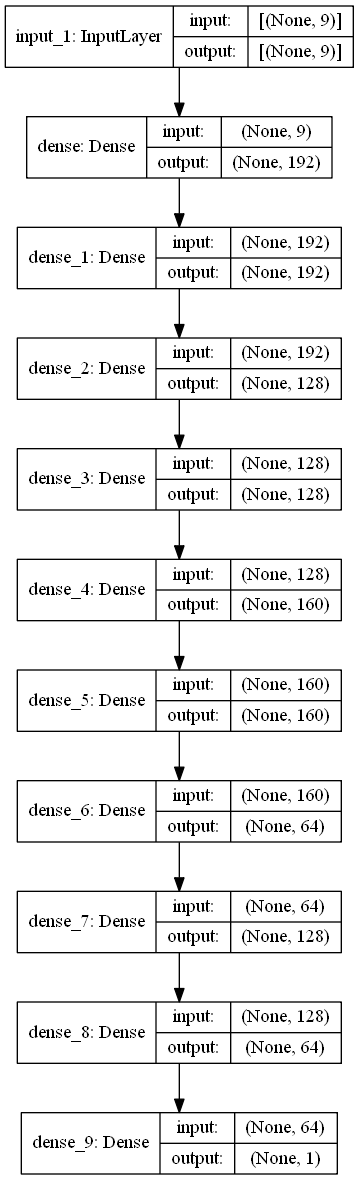

In [53]:
keras.utils.plot_model(model_ann_essen, 'ann_model_essen_bike_rental_demand.png', show_shapes=True)

#### 3.1.5 Train the model

For **performance reasons**, the model was **only trained for 20 epochs** in hyperparameter tuning.  
That is why we are **now continuing to train** the model to achieve the **best possible result**.

**Define** callback to restore model weights from the epoch with the best value of val_loss and to avoid overfitting:

In [54]:
callback_ess = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=50,
    restore_best_weights=True
    )

**Train** the model for a fixed number of **epochs** (iterations on a dataset):

In [55]:
model_ann_essen.fit(x_ess_norm_train, y_ess_norm_train, epochs=500, validation_data=(x_ess_norm_hold,y_ess_norm_hold), callbacks=[callback_ess])

Train on 4325 samples, validate on 1731 samples
Epoch 1/500
4325/4325 [==============================] - ETA: 27s - loss: 3.56 - ETA: 1s - loss: 2.8499 - ETA: 0s - loss: 2.938 - ETA: 0s - loss: 2.980 - ETA: 0s - loss: 2.963 - ETA: 0s - loss: 2.974 - 1s 146us/sample - loss: 3.0148 - val_loss: 3.1514
Epoch 2/500
4325/4325 [==============================] - ETA: 0s - loss: 3.560 - ETA: 0s - loss: 3.106 - ETA: 0s - loss: 2.933 - ETA: 0s - loss: 3.018 - ETA: 0s - loss: 3.000 - ETA: 0s - loss: 3.002 - 0s 77us/sample - loss: 3.0262 - val_loss: 3.1882
Epoch 3/500
4325/4325 [==============================] - ETA: 0s - loss: 4.481 - ETA: 0s - loss: 3.217 - ETA: 0s - loss: 3.136 - ETA: 0s - loss: 3.094 - ETA: 0s - loss: 3.090 - ETA: 0s - loss: 3.050 - 0s 77us/sample - loss: 3.0370 - val_loss: 3.1279
Epoch 4/500
4325/4325 [==============================] - ETA: 0s - loss: 3.331 - ETA: 0s - loss: 2.901 - ETA: 0s - loss: 3.010 - ETA: 0s - loss: 3.008 - ETA: 0s - loss: 3.034 - ETA: 0s - loss: 3.045 -

Epoch 33/500
4325/4325 [==============================] - ETA: 0s - loss: 3.568 - ETA: 0s - loss: 2.621 - ETA: 0s - loss: 2.746 - ETA: 0s - loss: 2.772 - ETA: 0s - loss: 2.738 - ETA: 0s - loss: 2.723 - 0s 74us/sample - loss: 2.7115 - val_loss: 3.0667
Epoch 34/500
4325/4325 [==============================] - ETA: 0s - loss: 2.668 - ETA: 0s - loss: 2.686 - ETA: 0s - loss: 2.684 - ETA: 0s - loss: 2.666 - ETA: 0s - loss: 2.718 - ETA: 0s - loss: 2.716 - 0s 75us/sample - loss: 2.7141 - val_loss: 3.0609
Epoch 35/500
4325/4325 [==============================] - ETA: 0s - loss: 2.676 - ETA: 0s - loss: 2.573 - ETA: 0s - loss: 2.616 - ETA: 0s - loss: 2.650 - ETA: 0s - loss: 2.699 - ETA: 0s - loss: 2.716 - 0s 73us/sample - loss: 2.7197 - val_loss: 2.9962
Epoch 36/500
4325/4325 [==============================] - ETA: 0s - loss: 2.407 - ETA: 0s - loss: 2.738 - ETA: 0s - loss: 2.684 - ETA: 0s - loss: 2.705 - ETA: 0s - loss: 2.696 - ETA: 0s - loss: 2.699 - 0s 75us/sample - loss: 2.6966 - val_loss: 2.9

4325/4325 [==============================] - ETA: 0s - loss: 2.301 - ETA: 0s - loss: 2.282 - ETA: 0s - loss: 2.304 - ETA: 0s - loss: 2.355 - ETA: 0s - loss: 2.401 - ETA: 0s - loss: 2.381 - 0s 78us/sample - loss: 2.3629 - val_loss: 3.0006
Epoch 66/500
4325/4325 [==============================] - ETA: 0s - loss: 2.562 - ETA: 0s - loss: 2.259 - ETA: 0s - loss: 2.334 - ETA: 0s - loss: 2.346 - ETA: 0s - loss: 2.363 - ETA: 0s - loss: 2.362 - 0s 74us/sample - loss: 2.3695 - val_loss: 3.0169
Epoch 67/500
4325/4325 [==============================] - ETA: 0s - loss: 1.774 - ETA: 0s - loss: 2.359 - ETA: 0s - loss: 2.274 - ETA: 0s - loss: 2.296 - ETA: 0s - loss: 2.332 - ETA: 0s - loss: 2.346 - 0s 75us/sample - loss: 2.3410 - val_loss: 2.9906
Epoch 68/500
4325/4325 [==============================] - ETA: 0s - loss: 2.135 - ETA: 0s - loss: 2.164 - ETA: 0s - loss: 2.222 - ETA: 0s - loss: 2.267 - ETA: 0s - loss: 2.330 - ETA: 0s - loss: 2.309 - 0s 74us/sample - loss: 2.3298 - val_loss: 3.0050
Epoch 69/

4325/4325 [==============================] - ETA: 0s - loss: 2.430 - ETA: 0s - loss: 1.967 - ETA: 0s - loss: 2.009 - ETA: 0s - loss: 2.018 - ETA: 0s - loss: 2.037 - ETA: 0s - loss: 2.052 - 0s 75us/sample - loss: 2.0463 - val_loss: 3.0439
Epoch 98/500
4325/4325 [==============================] - ETA: 0s - loss: 2.307 - ETA: 0s - loss: 1.967 - ETA: 0s - loss: 2.022 - ETA: 0s - loss: 1.978 - ETA: 0s - loss: 1.998 - ETA: 0s - loss: 2.055 - 0s 75us/sample - loss: 2.0780 - val_loss: 3.0801
Epoch 99/500
4325/4325 [==============================] - ETA: 0s - loss: 2.563 - ETA: 0s - loss: 2.114 - ETA: 0s - loss: 2.108 - ETA: 0s - loss: 2.043 - ETA: 0s - loss: 2.057 - ETA: 0s - loss: 2.040 - 0s 74us/sample - loss: 2.0382 - val_loss: 3.0238
Epoch 100/500
4325/4325 [==============================] - ETA: 0s - loss: 2.113 - ETA: 0s - loss: 1.985 - ETA: 0s - loss: 1.938 - ETA: 0s - loss: 1.942 - ETA: 0s - loss: 2.003 - ETA: 0s - loss: 2.039 - 0s 96us/sample - loss: 2.0483 - val_loss: 3.0353


#### 3.1.6 Evaluate the model's test performance

In [57]:
pred_ann_ess = model_ann_essen.predict(x_ess_norm_test)

# Calculate MAE and RMSE
mae_ann_ess = mean_absolute_error(y_ess_norm_test,pred_ann_ess)
rmse_ann_ess = mean_squared_error(y_ess_norm_test,pred_ann_ess)**0.5

print("Essen MAE: ", mae_ann_ess)
print("Essen RMSE: ", rmse_ann_ess)

Essen MAE:  3.04883446011015
Essen RMSE:  4.339156594901836


---

### 3.2 Artificial Neural Network Cologne

In [58]:
fullRentalDataCologne.describe()

,airPressure,airTemperature,cloudCoverage,windVelocity,precipitationAmount,relativeHumidity,numOfRentedBikes,dayOfTheWeek,isWeekend,hour
count,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000
mean,1003.785019,11.686810,5.212375,3.339961,0.083194,73.646883,112.167260,2.994834,0.283779,11.499483
std,10.530240,7.411052,2.766561,1.805300,0.474169,18.197979,81.574118,1.999965,0.450857,6.922813
min,963.500000,-9.200000,-1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,997.500000,6.200000,3.000000,2.000000,0.000000,61.000000,39.000000,1.000000,0.000000,5.500000
50%,1004.000000,11.000000,7.000000,3.000000,0.000000,78.000000,102.000000,3.000000,0.000000,11.000000
75%,1010.800000,16.600000,7.000000,4.300000,0.000000,89.000000,168.000000,5.000000,1.000000,17.500000
max,1036.600000,39.600000,8.000000,16.000000,16.600000,100.000000,402.000000,6.000000,1.000000,23.000000


**Instantiate** a new DataFrame Object which will be **normalized** in (3.2.2):

In [59]:
fullRentalDataCologne_norm = fullRentalDataCologne.copy()

#### 3.2.2 Data Preprocessing

Our Dataset contains negative as well as very high values.  
This is not ideal for a neural network, in general we want to have our input values small.  
Our output value numOfRentedBikes does not have to be in the range [0, 1], but we will call it y_norm too, to avoid a name collision in this notebook.  
We will **rescale** input values to be in the **[0, 1] range** in the following:

In [60]:
# Re-scale: (input minus minimum) divided by range
fullRentalDataCologne_norm['airPressure'] = (fullRentalDataCologne['airPressure'] - fullRentalDataCologne['airPressure'].min()) / (fullRentalDataCologne['airPressure'].max() - fullRentalDataCologne['airPressure'].min())
fullRentalDataCologne_norm['airTemperature'] = (fullRentalDataCologne['airTemperature'] - fullRentalDataCologne['airTemperature'].min()) / (fullRentalDataCologne['airTemperature'].max() - fullRentalDataCologne['airTemperature'].min())
fullRentalDataCologne_norm['cloudCoverage'] = (fullRentalDataCologne['cloudCoverage'] - fullRentalDataCologne['cloudCoverage'].min()) / (fullRentalDataCologne['cloudCoverage'].max() - fullRentalDataCologne['cloudCoverage'].min())
fullRentalDataCologne_norm['windVelocity'] = (fullRentalDataCologne['windVelocity'] - fullRentalDataCologne['windVelocity'].min()) / (fullRentalDataCologne['windVelocity'].max() - fullRentalDataCologne['windVelocity'].min())
fullRentalDataCologne_norm['precipitationAmount'] = (fullRentalDataCologne['precipitationAmount'] - fullRentalDataCologne['precipitationAmount'].min()) / (fullRentalDataCologne['precipitationAmount'].max() - fullRentalDataCologne['precipitationAmount'].min())
fullRentalDataCologne_norm['relativeHumidity'] = (fullRentalDataCologne['relativeHumidity'] - fullRentalDataCologne['relativeHumidity'].min()) / (fullRentalDataCologne['relativeHumidity'].max() - fullRentalDataCologne['relativeHumidity'].min())
fullRentalDataCologne_norm['dayOfTheWeek'] = (fullRentalDataCologne['dayOfTheWeek'] - fullRentalDataCologne['dayOfTheWeek'].min()) / (fullRentalDataCologne['dayOfTheWeek'].max() - fullRentalDataCologne['dayOfTheWeek'].min())
fullRentalDataCologne_norm['hour'] = (fullRentalDataCologne['hour'] - fullRentalDataCologne['hour'].min()) / (fullRentalDataCologne['hour'].max() - fullRentalDataCologne['hour'].min())

In [61]:
fullRentalDataCologne_norm.describe()

,airPressure,airTemperature,cloudCoverage,windVelocity,precipitationAmount,relativeHumidity,numOfRentedBikes,dayOfTheWeek,isWeekend,hour
count,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000
mean,0.551095,0.428008,0.690264,0.208748,0.005012,0.686272,112.167260,0.499139,0.283779,0.499978
std,0.144053,0.151866,0.307396,0.112831,0.028564,0.216643,81.574118,0.333327,0.450857,0.300992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.465116,0.315574,0.444444,0.125000,0.000000,0.535714,39.000000,0.166667,0.000000,0.239130
50%,0.554036,0.413934,0.888889,0.187500,0.000000,0.738095,102.000000,0.500000,0.000000,0.478261
75%,0.647059,0.528689,0.888889,0.268750,0.000000,0.869048,168.000000,0.833333,1.000000,0.760870
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,402.000000,1.000000,1.000000,1.000000


**Split** in 50% training data, 20% validation/holdout data and 30% testing data sets:

In [62]:
# x is the input variable
# y is the output variable
from sklearn.model_selection import train_test_split

# Divide Dataset into Input(x_cologne_norm) and Output(y_cologne_norm)
x_cologne_norm = fullRentalDataCologne_norm[['airPressure','airTemperature','cloudCoverage','windVelocity','precipitationAmount','relativeHumidity','dayOfTheWeek', 'isWeekend','hour']]
y_cologne_norm = fullRentalDataCologne_norm['numOfRentedBikes']

# Split the data in 70 training and 30 testing sets
x_col_norm_train, x_col_norm_test, y_col_norm_train, y_col_norm_test = train_test_split(x_cologne_norm, y_cologne_norm, test_size=0.3,random_state=34)

# Now split x_col_norm_train to achieve 50-20-30 split
x_col_norm_train, x_col_norm_hold, y_col_norm_train, y_col_norm_hold = train_test_split(x_col_norm_train, y_col_norm_train, test_size=(0.2/0.7),random_state=34 )

**Validate** the 50-20-30 **split**:

In [63]:
totalSize = len(fullRentalDataCologne_norm)
print(len(x_col_norm_train)/totalSize,len(x_col_norm_hold)/totalSize,len(x_col_norm_test)/totalSize)

0.4998278039260705 0.20009183790609575 0.3000803581678338


We will use the data sets (x_col_norm_train,y_col_norm_train), (x_col_norm_hold,y_col_norm_hold), (x_col_norm_test,y_col_norm_test) in the following.

#### 3.2.3 Building the model *with the Keras functional API*

**Build** the model:

In [64]:
def build_model_ann_col(hp):
    # Input Layer
    inputs = keras.Input(shape=(9,))

    # Hidden Layers
    ## First Hidden Layer
    dense = layers.Dense(units=hp.Int('hidden_layer_1_units', min_value=32, max_value=256, step=32), activation='relu')
    x = dense(inputs)
    
    ## Possibly added hidden layers
    for i in range(hp.Int('total_added_hidden_layers', 0, 10)):
        x = layers.Dense(units=hp.Int(f'hidden_layer_{i+2}_units', min_value=32, max_value=256, step=32), activation='relu')(x)
        
    # Output Layer
    outputs = layers.Dense(1, activation='relu')(x)

    # Instantiate the model
    model_ann = keras.Model(inputs, outputs, name='bike_rental_demand')
    
    # Compile the model
    model_ann.compile(optimizer='Adamax', loss='mean_absolute_error') # 'Adam' also delivered good results
    
    return model_ann

#### 3.2.4 Finding the best model *with hyperparameter tuning*

**Instantiate** a **tuner** to perform hypertuning:

The Keras Tuner has four tuners available - `RandomSearch`, `Hyperband`, `BayesianOptimization`, and `Sklearn`.  
We will use `Hyperband` because the Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model.

In [65]:
tuner_col = Hyperband(
    build_model_ann_col,
    objective = 'val_loss',
    max_epochs = 20,
    factor = 3,
    executions_per_trial = 1,
    directory = os.path.normpath('C:/DSML_MLTISE_LOG/Cologne'), # Due to a bug in Windows, it was impossible to create the directory in the project directory
    project_name = 'kerastuner_LOG',
    overwrite = True # deletes old LOG's
    )

**Display** search space overview:

In [66]:
tuner_col.search_space_summary()

**Define** a callback to clear the training outputs at the end of every training step:

In [67]:
class ClearTrainingOutputCologne(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

**Run** the **hyperparameter search**:

In [68]:
tuner_col.search(
    x_col_norm_train,
    y_col_norm_train,
    validation_data=(x_col_norm_hold,y_col_norm_hold),
    callbacks = [ClearTrainingOutputCologne()]
    )

INFO:tensorflow:Oracle triggered exit


**Display** the **best models**, their **hyperparameters**, and the resulting **metrics**:

In [69]:
tuner_col.results_summary()

**Get** the **optimal hyperparameters**:

In [70]:
ann_col_best_hps = tuner_col.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first hidden layer is {ann_col_best_hps.get('hidden_layer_1_units')} 
and the total number of hidden layers is {ann_col_best_hps.get('total_added_hidden_layers')+1}.
""")


The hyperparameter search is complete. The optimal number of units in the first hidden layer is 224 
and the total number of hidden layers is 9.



**Retrieve** the model with the optimal hyperparameters:

In [71]:
# Get the best model for Cologne
model_ann_cologne = tuner_col.get_best_models(num_models=1)[0]

**Show** the model **summary**:

In [72]:
model_ann_cologne.summary()

Model: "bike_rental_demand"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense (Dense)                (None, 224)               2240      
_________________________________________________________________
dense_1 (Dense)              (None, 192)               43200     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                12352     
_________________________________________________________________
dense_3 (Dense)              (None, 192)               12480     
_________________________________________________________________
dense_4 (Dense)              (None, 192)               37056     
_________________________________________________________________
dense_5 (Dense)              (None, 224)        

**Plot** the model as a **graph**:

To see the visualization you need to install pydot and graphviz.  
You can use:  
pip install pydot  
pip install graphviz  
You may need to restart the Kernel afterwards.

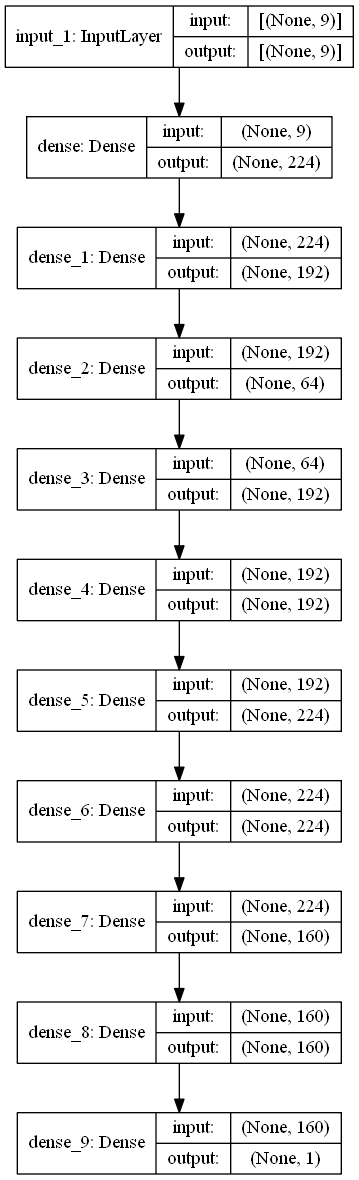

In [73]:
keras.utils.plot_model(model_ann_cologne, 'ann_model_cologne_bike_rental_demand.png', show_shapes=True)

#### 3.2.5 Train the model

For **performance reasons**, the model was **only trained for 20 epochs** in hyperparameter tuning.  
That is why we are **now continuing to train** the model to achieve the **best possible result**.

**Define** callback to restore model weights from the epoch with the best value of val_loss and to avoid overfitting:

In [74]:
callback_col = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=50,
    restore_best_weights=True
    )

**Train** the model for a fixed number of **epochs** (iterations on a dataset):

In [75]:
model_ann_cologne.fit(x_col_norm_train, y_col_norm_train, epochs=500, validation_data=(x_col_norm_hold,y_col_norm_hold), callbacks=[callback_col])

Train on 4354 samples, validate on 1743 samples
Epoch 1/500
4354/4354 [==============================] - ETA: 30s - loss: 28.335 - ETA: 1s - loss: 27.047 - ETA: 0s - loss: 26.99 - ETA: 0s - loss: 26.53 - ETA: 0s - loss: 26.75 - ETA: 0s - loss: 26.78 - ETA: 0s - loss: 26.84 - ETA: 0s - loss: 26.72 - 1s 169us/sample - loss: 26.6621 - val_loss: 25.1435
Epoch 2/500
4354/4354 [==============================] - ETA: 0s - loss: 18.36 - ETA: 0s - loss: 27.82 - ETA: 0s - loss: 26.82 - ETA: 0s - loss: 26.46 - ETA: 0s - loss: 26.79 - ETA: 0s - loss: 26.96 - ETA: 0s - loss: 26.80 - ETA: 0s - loss: 26.55 - 0s 108us/sample - loss: 26.4664 - val_loss: 24.6447
Epoch 3/500
4354/4354 [==============================] - ETA: 0s - loss: 28.23 - ETA: 0s - loss: 24.56 - ETA: 0s - loss: 25.36 - ETA: 0s - loss: 25.43 - ETA: 0s - loss: 25.90 - ETA: 0s - loss: 25.87 - ETA: 0s - loss: 26.02 - 0s 95us/sample - loss: 26.0489 - val_loss: 24.2785
Epoch 4/500
4354/4354 [==============================] - ETA: 0s - loss

4354/4354 [==============================] - ETA: 0s - loss: 22.54 - ETA: 0s - loss: 22.39 - ETA: 0s - loss: 22.45 - ETA: 0s - loss: 22.46 - ETA: 0s - loss: 22.72 - ETA: 0s - loss: 22.91 - ETA: 0s - loss: 22.97 - 0s 94us/sample - loss: 22.9065 - val_loss: 23.3318
Epoch 29/500
4354/4354 [==============================] - ETA: 0s - loss: 21.67 - ETA: 0s - loss: 21.97 - ETA: 0s - loss: 22.09 - ETA: 0s - loss: 22.17 - ETA: 0s - loss: 22.42 - ETA: 0s - loss: 22.80 - ETA: 0s - loss: 23.08 - 0s 93us/sample - loss: 23.6051 - val_loss: 23.8222
Epoch 30/500
4354/4354 [==============================] - ETA: 0s - loss: 25.67 - ETA: 0s - loss: 22.67 - ETA: 0s - loss: 24.27 - ETA: 0s - loss: 23.59 - ETA: 0s - loss: 23.16 - ETA: 0s - loss: 22.84 - ETA: 0s - loss: 22.84 - 0s 95us/sample - loss: 22.7348 - val_loss: 22.3929
Epoch 31/500
4354/4354 [==============================] - ETA: 0s - loss: 17.01 - ETA: 0s - loss: 21.61 - ETA: 0s - loss: 22.83 - ETA: 0s - loss: 22.58 - ETA: 0s - loss: 22.72 - ETA:

4354/4354 [==============================] - ETA: 0s - loss: 16.38 - ETA: 0s - loss: 20.27 - ETA: 0s - loss: 20.40 - ETA: 0s - loss: 20.71 - ETA: 0s - loss: 20.63 - ETA: 0s - loss: 20.45 - ETA: 0s - loss: 20.72 - ETA: 0s - loss: 20.73 - 0s 100us/sample - loss: 20.7634 - val_loss: 21.8763
Epoch 57/500
4354/4354 [==============================] - ETA: 0s - loss: 20.98 - ETA: 0s - loss: 20.46 - ETA: 0s - loss: 19.97 - ETA: 0s - loss: 20.13 - ETA: 0s - loss: 20.23 - ETA: 0s - loss: 20.09 - ETA: 0s - loss: 20.22 - ETA: 0s - loss: 20.17 - 0s 98us/sample - loss: 20.1722 - val_loss: 22.4905
Epoch 58/500
4354/4354 [==============================] - ETA: 0s - loss: 17.13 - ETA: 0s - loss: 20.82 - ETA: 0s - loss: 20.32 - ETA: 0s - loss: 19.96 - ETA: 0s - loss: 20.16 - ETA: 0s - loss: 20.01 - ETA: 0s - loss: 20.21 - ETA: 0s - loss: 20.30 - 0s 99us/sample - loss: 20.3037 - val_loss: 22.6214
Epoch 59/500
4354/4354 [==============================] - ETA: 0s - loss: 29.37 - ETA: 0s - loss: 20.78 - ETA

4354/4354 [==============================] - ETA: 0s - loss: 17.90 - ETA: 0s - loss: 20.74 - ETA: 0s - loss: 19.74 - ETA: 0s - loss: 20.39 - ETA: 0s - loss: 20.26 - ETA: 0s - loss: 19.87 - ETA: 0s - loss: 19.82 - 0s 96us/sample - loss: 19.9821 - val_loss: 23.7007
Epoch 84/500
4354/4354 [==============================] - ETA: 0s - loss: 17.43 - ETA: 0s - loss: 19.75 - ETA: 0s - loss: 19.92 - ETA: 0s - loss: 19.47 - ETA: 0s - loss: 18.96 - ETA: 0s - loss: 18.96 - ETA: 0s - loss: 19.01 - 0s 93us/sample - loss: 19.0556 - val_loss: 21.9917
Epoch 85/500
4354/4354 [==============================] - ETA: 0s - loss: 14.44 - ETA: 0s - loss: 18.63 - ETA: 0s - loss: 19.77 - ETA: 0s - loss: 19.77 - ETA: 0s - loss: 19.55 - ETA: 0s - loss: 19.32 - ETA: 0s - loss: 19.15 - ETA: 0s - loss: 19.16 - 0s 97us/sample - loss: 19.1574 - val_loss: 22.0673
Epoch 86/500
4354/4354 [==============================] - ETA: 0s - loss: 16.72 - ETA: 0s - loss: 18.15 - ETA: 0s - loss: 18.41 - ETA: 0s - loss: 18.75 - ETA:

4354/4354 [==============================] - ETA: 0s - loss: 21.09 - ETA: 0s - loss: 17.44 - ETA: 0s - loss: 17.52 - ETA: 0s - loss: 17.24 - ETA: 0s - loss: 17.38 - ETA: 0s - loss: 17.45 - ETA: 0s - loss: 17.49 - ETA: 0s - loss: 17.59 - ETA: 0s - loss: 17.79 - 1s 119us/sample - loss: 17.7354 - val_loss: 21.4238
Epoch 111/500
4354/4354 [==============================] - ETA: 0s - loss: 14.02 - ETA: 0s - loss: 16.70 - ETA: 0s - loss: 17.22 - ETA: 0s - loss: 17.43 - ETA: 0s - loss: 17.31 - ETA: 0s - loss: 17.48 - ETA: 0s - loss: 17.52 - ETA: 0s - loss: 17.39 - ETA: 0s - loss: 17.44 - 1s 119us/sample - loss: 17.6171 - val_loss: 20.9381
Epoch 112/500
4354/4354 [==============================] - ETA: 0s - loss: 13.64 - ETA: 0s - loss: 18.63 - ETA: 0s - loss: 18.04 - ETA: 0s - loss: 18.01 - ETA: 0s - loss: 18.08 - ETA: 0s - loss: 17.59 - ETA: 0s - loss: 17.40 - ETA: 0s - loss: 17.38 - 0s 103us/sample - loss: 17.4370 - val_loss: 21.6655
Epoch 113/500
4354/4354 [==============================] 

4354/4354 [==============================] - ETA: 0s - loss: 13.71 - ETA: 0s - loss: 17.73 - ETA: 0s - loss: 17.27 - ETA: 0s - loss: 16.97 - ETA: 0s - loss: 16.64 - ETA: 0s - loss: 16.62 - ETA: 0s - loss: 16.32 - ETA: 0s - loss: 16.37 - 0s 99us/sample - loss: 16.2914 - val_loss: 21.2849
Epoch 138/500
4354/4354 [==============================] - ETA: 0s - loss: 11.94 - ETA: 0s - loss: 15.22 - ETA: 0s - loss: 16.49 - ETA: 0s - loss: 16.09 - ETA: 0s - loss: 16.29 - ETA: 0s - loss: 16.35 - ETA: 0s - loss: 16.07 - ETA: 0s - loss: 16.25 - 0s 107us/sample - loss: 16.3674 - val_loss: 23.0490
Epoch 139/500
4354/4354 [==============================] - ETA: 0s - loss: 21.29 - ETA: 0s - loss: 18.92 - ETA: 0s - loss: 18.08 - ETA: 0s - loss: 17.25 - ETA: 0s - loss: 16.82 - ETA: 0s - loss: 16.71 - ETA: 0s - loss: 16.90 - ETA: 0s - loss: 16.80 - ETA: 0s - loss: 16.90 - ETA: 0s - loss: 17.04 - 1s 134us/sample - loss: 17.1420 - val_loss: 21.2604
Epoch 140/500
4354/4354 [==============================] -

4354/4354 [==============================] - ETA: 0s - loss: 17.29 - ETA: 0s - loss: 16.04 - ETA: 0s - loss: 15.36 - ETA: 0s - loss: 14.99 - ETA: 0s - loss: 14.71 - ETA: 0s - loss: 14.41 - ETA: 0s - loss: 14.41 - ETA: 0s - loss: 14.52 - ETA: 0s - loss: 14.48 - ETA: 0s - loss: 14.52 - ETA: 0s - loss: 14.60 - 1s 144us/sample - loss: 14.5816 - val_loss: 20.9489
Epoch 165/500
4354/4354 [==============================] - ETA: 0s - loss: 14.92 - ETA: 0s - loss: 16.46 - ETA: 0s - loss: 15.82 - ETA: 0s - loss: 15.34 - ETA: 0s - loss: 15.26 - ETA: 0s - loss: 15.26 - ETA: 0s - loss: 15.08 - 0s 94us/sample - loss: 15.0022 - val_loss: 21.1696
Epoch 166/500
4354/4354 [==============================] - ETA: 0s - loss: 16.32 - ETA: 0s - loss: 13.47 - ETA: 0s - loss: 14.32 - ETA: 0s - loss: 14.10 - ETA: 0s - loss: 14.19 - ETA: 0s - loss: 14.43 - ETA: 0s - loss: 14.63 - 0s 94us/sample - loss: 14.5232 - val_loss: 21.3711
Epoch 167/500
4354/4354 [==============================] - ETA: 0s - loss: 16.51 - 

4354/4354 [==============================] - ETA: 0s - loss: 14.29 - ETA: 0s - loss: 16.10 - ETA: 0s - loss: 14.88 - ETA: 0s - loss: 14.67 - ETA: 0s - loss: 14.35 - ETA: 0s - loss: 14.26 - ETA: 0s - loss: 14.14 - ETA: 0s - loss: 14.01 - ETA: 0s - loss: 14.02 - 1s 118us/sample - loss: 14.0798 - val_loss: 21.0630
Epoch 192/500
4354/4354 [==============================] - ETA: 0s - loss: 17.90 - ETA: 0s - loss: 16.08 - ETA: 0s - loss: 15.66 - ETA: 0s - loss: 15.68 - ETA: 0s - loss: 15.41 - ETA: 0s - loss: 14.88 - ETA: 0s - loss: 14.79 - 0s 96us/sample - loss: 14.6201 - val_loss: 20.9107
Epoch 193/500
4354/4354 [==============================] - ETA: 0s - loss: 11.93 - ETA: 0s - loss: 13.67 - ETA: 0s - loss: 13.70 - ETA: 0s - loss: 13.66 - ETA: 0s - loss: 13.51 - ETA: 0s - loss: 13.67 - ETA: 0s - loss: 13.85 - 0s 97us/sample - loss: 13.9480 - val_loss: 20.7066
Epoch 194/500
4354/4354 [==============================] - ETA: 0s - loss: 14.64 - ETA: 0s - loss: 13.47 - ETA: 0s - loss: 14.25 - 

4354/4354 [==============================] - ETA: 0s - loss: 9.865 - ETA: 0s - loss: 11.41 - ETA: 0s - loss: 12.43 - ETA: 0s - loss: 12.74 - ETA: 0s - loss: 12.47 - ETA: 0s - loss: 12.50 - ETA: 0s - loss: 12.27 - ETA: 0s - loss: 12.07 - ETA: 0s - loss: 12.28 - 1s 117us/sample - loss: 12.2484 - val_loss: 20.9919
Epoch 220/500
4354/4354 [==============================] - ETA: 0s - loss: 8.953 - ETA: 0s - loss: 12.93 - ETA: 0s - loss: 13.04 - ETA: 0s - loss: 12.76 - ETA: 0s - loss: 12.55 - ETA: 0s - loss: 12.52 - ETA: 0s - loss: 12.34 - ETA: 0s - loss: 12.30 - ETA: 0s - loss: 12.33 - 0s 113us/sample - loss: 12.3503 - val_loss: 20.7139
Epoch 221/500
4354/4354 [==============================] - ETA: 0s - loss: 15.38 - ETA: 0s - loss: 12.99 - ETA: 0s - loss: 12.67 - ETA: 0s - loss: 12.30 - ETA: 0s - loss: 12.43 - ETA: 0s - loss: 12.28 - ETA: 0s - loss: 12.26 - ETA: 0s - loss: 12.25 - 0s 102us/sample - loss: 12.2825 - val_loss: 21.0623
Epoch 222/500
4354/4354 [==============================] 

Epoch 246/500
4354/4354 [==============================] - ETA: 0s - loss: 13.69 - ETA: 0s - loss: 11.70 - ETA: 0s - loss: 12.15 - ETA: 0s - loss: 12.30 - ETA: 0s - loss: 11.99 - ETA: 0s - loss: 11.82 - ETA: 0s - loss: 11.78 - ETA: 0s - loss: 11.67 - 0s 101us/sample - loss: 11.6884 - val_loss: 20.6556
Epoch 247/500
4354/4354 [==============================] - ETA: 0s - loss: 12.79 - ETA: 0s - loss: 11.47 - ETA: 0s - loss: 11.07 - ETA: 0s - loss: 11.31 - ETA: 0s - loss: 11.05 - ETA: 0s - loss: 10.96 - ETA: 0s - loss: 11.07 - ETA: 0s - loss: 11.16 - ETA: 0s - loss: 11.24 - 1s 119us/sample - loss: 11.2564 - val_loss: 21.2319
Epoch 248/500
4354/4354 [==============================] - ETA: 0s - loss: 10.74 - ETA: 0s - loss: 12.01 - ETA: 0s - loss: 11.30 - ETA: 0s - loss: 11.66 - ETA: 0s - loss: 11.77 - ETA: 0s - loss: 11.77 - ETA: 0s - loss: 11.64 - ETA: 0s - loss: 11.73 - ETA: 0s - loss: 11.66 - ETA: 0s - loss: 11.72 - 1s 136us/sample - loss: 11.6559 - val_loss: 20.5691
Epoch 249/500
4354/

#### 3.2.6 Evaluate the model's test performance

In [77]:
pred_ann_col = model_ann_cologne.predict(x_col_norm_test)

# Calculate MAE and RMSE
mae_ann_col = mean_absolute_error(y_col_norm_test, pred_ann_col)
rmse_ann_col = mean_squared_error(y_col_norm_test, pred_ann_col)**0.5

print("Cologne MAE: ", mae_ann_col)
print("Cologne RMSE: ", rmse_ann_col)

Cologne MAE:  20.46135052543792
Cologne RMSE:  29.57529844392166


---

# `3. Visualizations`

In [78]:
# calculate the deviation of the predicted value by Random forest model and the real value provided by the test data set

# essen
fullTestDataEssen = pd.merge(x_ess_test, y_ess_test, left_index=True, right_index=True)

fullTestDataEssen["predRandF"] = model_rf_ess.predict(fullTestDataEssen[["airPressure", "airTemperature", "cloudCoverage", "windVelocity", "precipitationAmount", "relativeHumidity", "dayOfTheWeek", "isWeekend", "hour"]])

fullTestDataEssen["deviation"] = abs(fullTestDataEssen["predRandF"] - fullTestDataEssen["numOfRentedBikes"])
# sort by index which represents the chronological order
fullTestDataEssen.sort_index(inplace=True)

# cologne
fullTestDataCologne = pd.merge(x_col_test, y_col_test, left_index=True, right_index=True)

fullTestDataCologne["predRandF"] = model_rf_col.predict(fullTestDataCologne[["airPressure", "airTemperature", "cloudCoverage", "windVelocity", "precipitationAmount", "relativeHumidity", "dayOfTheWeek", "isWeekend", "hour"]])
fullTestDataCologne["deviation"] = abs(fullTestDataCologne["predRandF"] - fullTestDataCologne["numOfRentedBikes"])

# sort by index which represents the chronological order
fullTestDataCologne.sort_index(inplace=True)

## 3.1 Deviations

### 3.1.1 Deviation of Essen Data

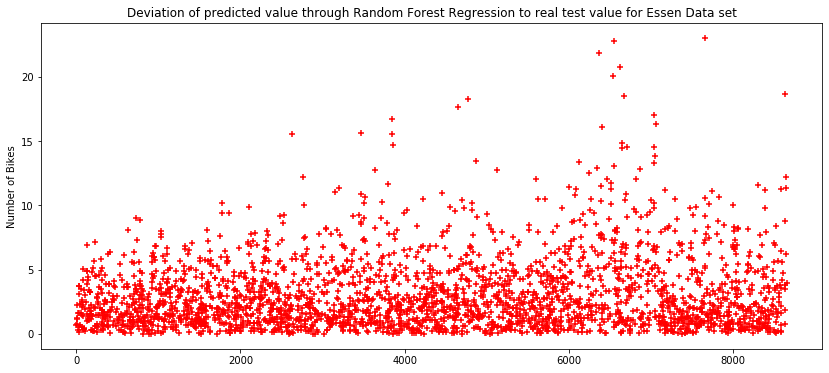

Max Deviation is:  23.0496830730163
Min Deviation is:  0.0009743484914712663


In [79]:
plt.figure(figsize=(14,6))

plt.scatter(fullTestDataEssen.index, fullTestDataEssen["deviation"], marker="+", c="red")

plt.ylabel("Number of Bikes")
plt.title("Deviation of predicted value through Random Forest Regression to real test value for Essen Data set")
plt.show()

print("Max Deviation is: ", fullTestDataEssen["deviation"].max())
print("Min Deviation is: ", fullTestDataEssen["deviation"].min())

### 3.1.2 Deviation of Cologne Data

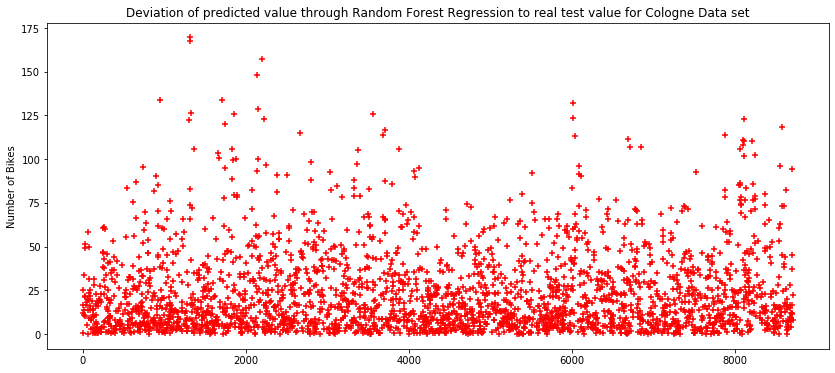

Max Deviation is:  169.55870445366247
Min Deviation is:  0.002589069142572953


In [80]:
plt.figure(figsize=(14,6))

plt.scatter(fullTestDataCologne.index, fullTestDataCologne["deviation"], marker="+", c="red")

plt.ylabel("Number of Bikes")
plt.title("Deviation of predicted value through Random Forest Regression to real test value for Cologne Data set")
plt.show()

print("Max Deviation is: ", fullTestDataCologne["deviation"].max())
print("Min Deviation is: ", fullTestDataCologne["deviation"].min())


## 3.2 Loss functions

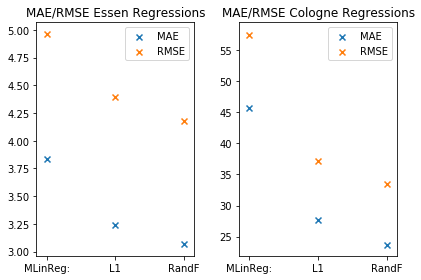

In [81]:
mae_ess = pd.Series({'MLinReg:':mae_lin_mod_ess, 'L1': mae_L1_ess, 'RandF': mae_rf_ess })
rmse_ess = pd.Series({'MLinReg:':rmse_lin_mod_ess,'L1': rmse_L1_ess, 'RandF': rmse_rf_ess })

plt.subplot(1, 2, 1)
plt.title("MAE/RMSE Essen Regressions")

plt.scatter(mae_ess.index, mae_ess, marker="x", label="MAE")
plt.scatter(rmse_ess.index, rmse_ess, marker="x", label="RMSE")
plt.legend()

mae_col = pd.Series({'MLinReg:':mae_lin_mod_col,'L1': mae_L1_col, 'RandF': mae_rf_col})
rmse_col = pd.Series({'MLinReg:':rmse_lin_mod_col,'L1': rmse_L1_col, 'RandF': rmse_rf_col})

plt.subplot(1, 2, 2)

plt.title("MAE/RMSE Cologne Regressions")
plt.scatter(mae_col.index, mae_col, marker="x", label="MAE")
plt.scatter(rmse_col.index, rmse_col, marker="x", label="RMSE")
plt.legend()

plt.tight_layout()
plt.show()

So far the Artificial Neural Network provides the best results for both Data sets.

# `4. Material for report`

The average amount of rented bikes for the whole time period can be read out from:

In [82]:
#fullRentalDataCologne.describe()
#fullRentalEssen.describe()

Essen: 6.260402  
Cologne: 112.167260